## Import modules

In [1]:
# this is for the jupyter notebook at JupyterLab
# to make sys.path between the terminal and Jupyter same
import sys

print(sys.path) # especially the path to site-packages are different... so thats why couldn't find correct package...

# sys.path from terminal at scvi0190_env
# obtained by excuting `python -c "import sys; print('\n'.join(sys.path))"`
sys.path = [
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload",
    "/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages"
]

print(sys.path)

['/nfs/team205/kk18/Analysis/multiVI/notebooks', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload', '', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages']
['/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python39.zip', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/lib-dynload', '/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages']


In [2]:
import scvi
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

scvi.settings.seed = 420

Global seed set to 0
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.

In [3]:
import session_info
session_info.show()

## Read in data

In [4]:
# paired
# only multiome
adata_mvi = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/vCM/MultiVI-pre_paired_foetal_vCMs_raw.h5ad')
adata_mvi

AnnData object with n_obs × n_vars = 35705 × 544641
    obs: 'sangerID', 'combinedID', 'donor', 'region', 'age', 'sex', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'week', 'trimester', 'cycling', 'S_score', 'G2M_score', 'phase', 'fine_grain', 'mid_grain', 'coarse_grain', 'batch_key', 'total_counts', 'total_counts_mt', 'total_counts_ribo', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'

In [5]:
adata_mvi.obs['fine_grain'].value_counts()

VentricularCardiomyocytesRightCompact         12008
VentricularCardiomyocytesLeftCompact          11397
VentricularCardiomyocytesLeftTrabeculated      5054
VentricularCardiomyocytesCycling               4977
VentricularCardiomyocytesRightTrabeculated     2269
Name: fine_grain, dtype: int64

In [6]:
# remove cycling population
adata_mvi = adata_mvi[adata_mvi.obs['fine_grain'].isin([
    'VentricularCardiomyocytesLeftCompact','VentricularCardiomyocytesLeftTrabeculated'
])]
adata_mvi.obs['fine_grain'].value_counts()

VentricularCardiomyocytesLeftCompact         11397
VentricularCardiomyocytesLeftTrabeculated     5054
Name: fine_grain, dtype: int64

In [7]:
adata_mvi.obs

,sangerID,combinedID,donor,region,age,sex,facility,cell_or_nuclei,modality,kit_10x,...,n_genes_by_counts,pct_counts_mt,pct_counts_ribo,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mt,log1p_total_counts_ribo,scrublet_score,doublet_pval,doublet_bh_pval
barcode,,,,,,,,,,,,,,,,,,,,,
BHF_F_Hea11933669_BHF_F_Hea11596622_AATTAGCGTTAGCATG-1,BHF_F_Hea11933669,BHF_F_Hea11933669_BHF_F_Hea11596622,Hst33,whole sample,13W0D,female,Sanger,nuclei,Multiome,Multiome-v1,...,2076,1.362089,1.570185,7.638680,8.573007,4.290460,4.430817,0.126360,0.370379,0.881283
HCAHeartST13386009_HCAHeartST13303419_ATCCTTAGTGGATTGC-1,HCAHeartST13386009,HCAHeartST13386009_HCAHeartST13303419,Hst41,atria,20W0D,male,Sanger,nuclei,Multiome,Multiome-v1,...,2299,2.856576,2.439992,7.740664,8.525558,4.976734,4.820282,0.086068,0.219175,0.733829
BHF_F_Hea13188324_BHF_F_Hea13187626_CGAGGCAAGGCTGTCA-1,BHF_F_Hea13188324,BHF_F_Hea13188324_BHF_F_Hea13187626,Hst41,left ventricle,20W0D,male,Sanger,nuclei,Multiome,Multiome-v1,...,1764,3.310502,0.742009,7.475906,8.161945,4.762174,3.295837,0.118524,0.376974,0.932287
BHF_F_Hea13188324_BHF_F_Hea13187626_TAGTAAGCACATACTG-1,BHF_F_Hea13188324,BHF_F_Hea13188324_BHF_F_Hea13187626,Hst41,left ventricle,20W0D,male,Sanger,nuclei,Multiome,Multiome-v1,...,1703,0.133298,0.106638,7.440734,8.230044,1.791759,1.609438,0.036697,0.830124,0.932287
BHF_F_Hea13188324_BHF_F_Hea13187626_GTTTAACCACGTAATT-1,BHF_F_Hea13188324,BHF_F_Hea13188324_BHF_F_Hea13187626,Hst41,left ventricle,20W0D,male,Sanger,nuclei,Multiome,Multiome-v1,...,1797,0.339147,0.096899,7.494430,8.325790,2.708050,1.609438,0.053483,0.814834,0.932287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BHF_F_Hea11933669_BHF_F_Hea11596622_GCCCAAATCACATTGA-1,BHF_F_Hea11933669,BHF_F_Hea11933669_BHF_F_Hea11596622,Hst33,whole sample,13W0D,female,Sanger,nuclei,Multiome,Multiome-v1,...,2090,0.434333,0.868666,7.645398,8.483843,3.091043,3.761200,0.123762,0.556822,0.881283
BHF_F_Hea11933667_BHF_F_Hea11596620_CGCAATTAGGTCTTGG-1,BHF_F_Hea11933667,BHF_F_Hea11933667_BHF_F_Hea11596620,Hst33,whole sample,13W0D,female,Sanger,nuclei,Multiome,Multiome-v1,...,1083,4.306488,3.747204,6.988413,7.489412,4.356709,4.219508,0.039370,0.851546,0.941734
BHF_F_Hea11933667_BHF_F_Hea11596620_GCGCTTGCAGGATGGC-1,BHF_F_Hea11933667,BHF_F_Hea11933667_BHF_F_Hea11596620,Hst33,whole sample,13W0D,female,Sanger,nuclei,Multiome,Multiome-v1,...,1876,0.133809,0.356824,7.537430,8.408494,1.945910,2.833213,0.025028,0.878757,0.941734


In [8]:
adata_mvi.var['modality'].value_counts()

Peaks              508040
Gene Expression     36601
Name: modality, dtype: int64

In [9]:
adata_mvi.obs['modality'].value_counts()

Multiome    16451
Name: modality, dtype: int64

In [10]:
# MultiVI requires the features to be ordered, 
# such that genes appear before genomic regions. In this case this is already the case, but it’s always good to verify:
adata_mvi = adata_mvi[:, adata_mvi.var["modality"].argsort()].copy()
adata_mvi.var

,modality,gene_name_scRNA-0,gene_id,seqnames,start,end,width,strand,score,replicateScoreQuantile,...,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx,N
MIR1302-2HG,Gene Expression,MIR1302-2HG,ENSG00000243485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL391261.2,Gene Expression,AL391261.2,ENSG00000258847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FUT8-AS1,Gene Expression,FUT8-AS1,ENSG00000276116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FUT8,Gene Expression,FUT8,ENSG00000033170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL355076.2,Gene Expression,AL355076.2,ENSG00000258760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr5:177134858_177135358,Peaks,NaN,NaN,chr5,177134858.0,177135358.0,501.0,*,1.95268,0.052,...,2.0,Megakaryocytes._.Rep2,2082.0,NSD1,Exonic,878.0,uc063kbv.1,0.4711,26270.0,0.0
chr5:177134341_177134841,Peaks,NaN,NaN,chr5,177134341.0,177134841.0,501.0,*,18.50900,0.959,...,2.0,MastCells._.Rep2,1565.0,NSD1,Intronic,361.0,uc063kbv.1,0.6647,26269.0,0.0
chr5:177133469_177133969,Peaks,NaN,NaN,chr5,177133469.0,177133969.0,501.0,*,35.92410,0.997,...,3.0,Monocytes._.Rep3,693.0,NSD1,Intronic,78.0,uc003mfq.4,0.7824,26268.0,0.0
chr5:177194851_177195351,Peaks,NaN,NaN,chr5,177194851.0,177195351.0,501.0,*,2.30598,0.311,...,2.0,VentricularConductionSystemProximal._.Rep2,62075.0,NSD1,Intronic,17009.0,uc063kbw.1,0.4731,26281.0,0.0


## Setup and training MultiVI (with continuous covariates)

### All region, add 'region' key as a covariate

In [11]:
adata_mvi_sub = adata_mvi.copy()

In [12]:
# We also filter features to remove those that appear in fewer than 1% of the cells
print(adata_mvi_sub.shape)
sc.pp.filter_genes(adata_mvi_sub, min_cells=int(adata_mvi_sub.shape[0] * 0.01))
print(adata_mvi_sub.shape)

(16451, 544641)
(16451, 174604)


In [13]:
adata_mvi_sub.var['modality'].value_counts()

Peaks              161398
Gene Expression     13206
Name: modality, dtype: int64

In [14]:
adata_mvi_sub.obs['modality'].value_counts()

Multiome    16451
Name: modality, dtype: int64

In [15]:
pd.crosstab(adata_mvi_sub.obs['batch_key'],adata_mvi_sub.obs['region'])

region,apex,atria,atrial septum,whole sample,heart without node,left ventricle,node,outflow tract,right ventricle,right ventricle and papillaries
batch_key,,,,,,,,,,
C82_Nuclei_Multiome-v1,0,0,0,27,0,0,0,0,0,0
C85_Nuclei_Multiome-v1,0,0,0,121,0,0,0,0,0,0
C87_Nuclei_Multiome-v1,0,0,0,735,0,0,0,0,0,0
C92_Nuclei_Multiome-v1,0,0,0,186,0,0,0,0,0,0
C98_Nuclei_Multiome-v1,0,0,0,233,0,0,0,0,0,0
C104_Nuclei_Multiome-v1,290,0,0,0,0,0,0,85,0,0
Hst33_Nuclei_Multiome-v1,0,0,0,9170,0,0,0,0,0,0
Hst36_Nuclei_Multiome-v1,0,0,0,1254,0,0,0,0,0,0
Hst39_Nuclei_Multiome-v1,0,0,0,0,1107,0,0,0,0,0


In [16]:
scvi.model.MULTIVI.setup_anndata(adata_mvi_sub, batch_key='modality',
                                categorical_covariate_keys=['batch_key','region'], ### adding 'region' ###
                                continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo',
                                                          'S_score','G2M_score'])

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [17]:
# When creating the object, we need to specify how many of the features are genes, and how many are genomic regions. 
# This is so MultiVI can determine the exact architecture for each modality.
mvi = scvi.model.MULTIVI(
    adata_mvi_sub,
    n_genes=(adata_mvi_sub.var['modality']=='Gene Expression').sum(),
    n_regions=(adata_mvi_sub.var['modality']=='Peaks').sum(),
)
mvi.view_anndata_setup()

/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Anndata setup with scvi-tools version 0.19.0.

Setup via `MULTIVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'modality',
│   'size_factor_key': None,
│   'categorical_covariate_keys': ['batch_key', 'region'],
│   'continuous_covariate_keys': ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'S_score', 'G2M_score'],
│   'protein_expression_obsm_key': None,
│   'protein_names_uns_key': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   1    │
│         n_cells          │ 16451  │
│ n_extra_categorical_covs │   2    │
│ n_extra_continuous_covs  │   5    │
│         n_labels         │   1    │
│          n_vars          │ 174604 │
└──────────────────────────┴────────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │                  adata.X                   │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│ extra_continuous_covs  │ adata.obsm['_scvi_extra_continuous_covs']  │
│         ind_x          │           adata.obs['_indices']            │
│         labels         │         adata.obs['_scvi_labels']          │
└────────────────────────┴────────────────────────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │  Multiome  │          0          │
└───────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['modality'] │  Multiome  │          0          │
└───────────────────────┴────────────┴─────────────────────┘

                      extra_categorical_covs State Registry                       
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃           Categories            ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │     C82_Nuclei_Multiome-v1      │          0          │
│                        │     C85_Nuclei_Multiome-v1      │          1          │
│                        │     C87_Nuclei_Multiome-v1      │          2          │
│                        │     C92_Nuclei_Multiome-v1      │          3          │
│                        │     C98_Nuclei_Multiome-v1      │          4          │
│                        │     C104_Nuclei_Multiome-v1     │          5          │
│                        │    Hst33_Nuclei_Multiome-v1     │          6          │
│                        │    Hst36_Nuclei_Multiome-v1     │          7          │
│                        │    Hst39_Nuclei_Multiome-v1     │          8          │
│                        │    Hst40_Nuclei_Multiome-v1     │          9          │
│                        │    Hst41_Nuclei_Multiome-v1     │         10          │
│                        │                                 │                     │
│  adata.obs['region']   │              apex               │          0          │
│                        │              atria              │          1          │
│                        │          atrial septum          │          2          │
│                        │          whole sample           │          3          │
│                        │       heart without node        │          4          │
│                        │         left ventricle          │          5          │
│                        │              node               │          6          │
│                        │          outflow tract          │          7          │
│                        │         right ventricle         │          8          │
│                        │ right ventricle and papillaries │          9          │
│                        │                                 │                     │
└────────────────────────┴─────────────────────────────────┴─────────────────────┘

  extra_continuous_covs State   
            Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │
│  adata.obs['pct_counts_mt']  │
│ adata.obs['pct_counts_ribo'] │
│     adata.obs['S_score']     │
│    adata.obs['G2M_score']    │
└──────────────────────────────┘

In [18]:
mvi.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/nfs/team205/kk18/miniconda3/envs/scvi0190_env/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:267: LightningDeprecationWarning: The `Callback.on_epoch_end` hook was deprecated in v1.6 and will be removed in v1.8. Please use `Callback.on_<train/validation/test>_epoch_end` instead.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 269/500:  54%|██████████████████████                   | 269/500 [1:57:00<1:40:28, 26.10s/it, loss=1.42e+04, v_num=1]
Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 30056.787. Signaling Trainer to stop.


In [19]:
mvi.save("/nfs/team205/heart/anndata_objects/Foetal/vCM/MultiVI-model_foetal_vCM_onlyMultiome_allregion_onlyLeft_feature-select-001")

In [20]:
adata_mvi_sub.obsm["MultiVI_latent"] = mvi.get_latent_representation()

In [21]:
adata_mvi_sub.write('/nfs/team205/heart/anndata_objects/Foetal/vCM/MultiVI-post_foetal_vCM_onlyMultiome_allregion_onlyLeft_feature-select-001.h5ad')

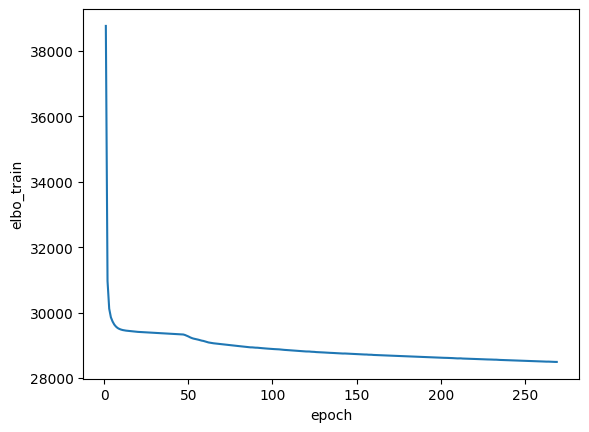

In [22]:
# Convergency plot
mvi.history['elbo_train']
x = np.linspace(1, (len(mvi.history['elbo_train'])), (len(mvi.history['elbo_train'])))
plt.plot(x, mvi.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()